In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
import joblib 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_csv("./dataset/training_data_lowercase.csv")
data.reset_index(drop=True, inplace=True)  

data.head()
data.columns = ['label','title']
data.head()

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34152 entries, 0 to 34151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   34152 non-null  int64 
 1   title   34152 non-null  object
dtypes: int64(1), object(1)
memory usage: 533.8+ KB


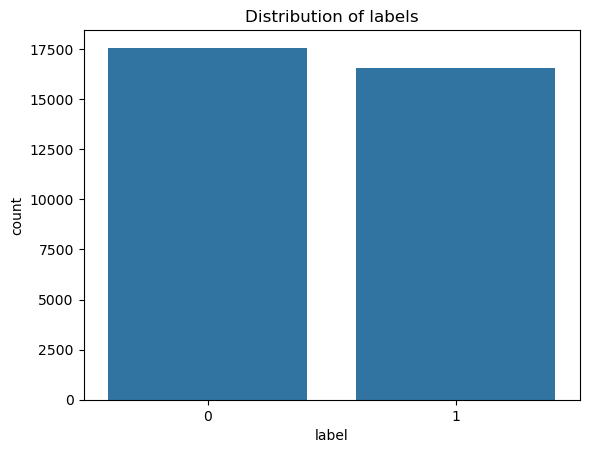

In [ ]:
sb.countplot(x='label', data=data)
plt.title("Distribution of labels")
plt.show()

In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special chars and digits
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

data['clean_title'] = data['title'].apply(preprocess_text)


In [ ]:

X = data['title'] 
y = data['label']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=10000)),
    ('clf', LinearSVC())
])

random_forest_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),  # reduce size for RF
    ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))  # n_jobs=-1 to use all cores
])



In [ ]:
models = {
  
    'Random Forest': random_forest_pipeline,
    'Linear SVC': svc_pipeline
}

In [ ]:
X = data['title'] 
y = data['label']

results = {}

In [ ]:
for name, model in models.items():
    print(f"Evaluating: {name}")
    cv_results = cross_validate(
        model, X, y,
        cv=5,
        scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
        n_jobs=-1, 
        return_train_score=False
    )
    results[name] = {
        metric: scores.mean() for metric, scores in cv_results.items() if metric.startswith('test_')
    }

Evaluating: Random Forest
Evaluating: Linear SVC


In [ ]:
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
               test_accuracy  test_precision_macro  test_recall_macro  \
Random Forest       0.897781              0.900673           0.897672   
Linear SVC          0.923109              0.924748           0.923117   

               test_f1_macro  
Random Forest       0.897430  
Linear SVC          0.922959  


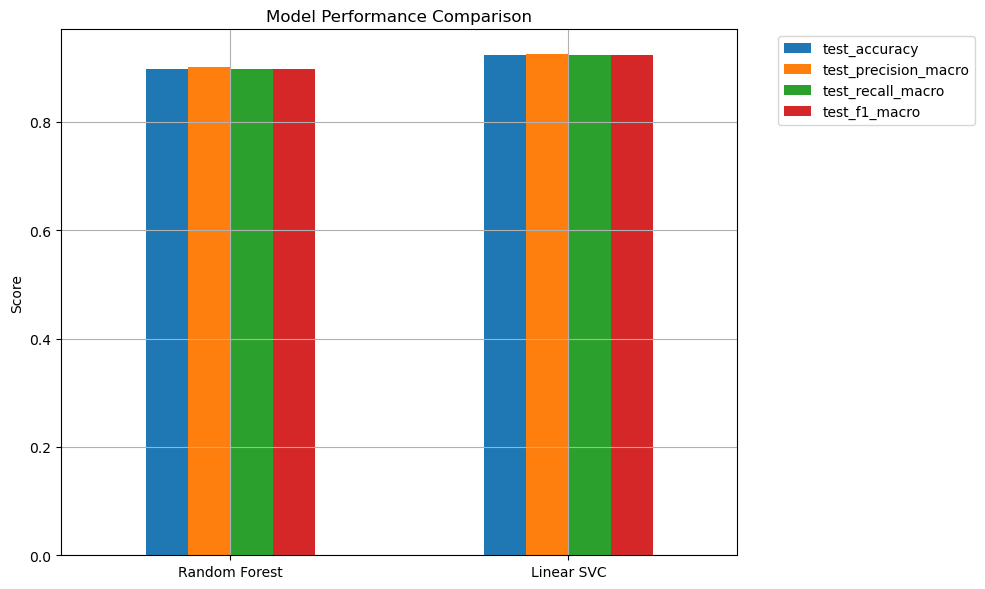

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
